<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

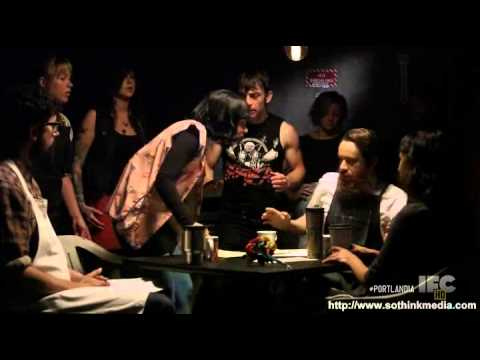

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jp/Desktop/Lambda/Assignments/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [ ]:
import pandas as pd

import spacy
from spacy.tokenizer import Tokenizer

In [55]:


url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"
CSV_FILEPATH = './data/yelp_coffeeshop_review_data.csv'
shops = pd.read_csv(CSV_FILEPATH)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


# DATA EXPLORATION
- DF SHAPE =(7616, 3)
- REVIEWS = 1-5 
- NUMBER OF SHOPS = 79
- DATES COLUMN
- 

In [56]:
shops['coffee_shop_name'].nunique()

79

In [57]:
shops.shape

(7616, 3)

In [58]:
shops['full_review_text'].iloc[3]

' 11/25/2016 Very cool decor! Good drinks Nice seating  However...  Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd.  Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average.  It feels like a Los Angeles coffee shot that is out of place. '

In [59]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [60]:
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [63]:
sample = "Friends, Romans, countrymen, lend me your ears;"
[token.text for token in tokenizer(sample)]

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

In [64]:
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [65]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 27779),
 ('and', 25748),
 (' ', 22606),
 ('a', 22085),
 ('I', 19780),
 ('to', 16904),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901)]

In [66]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        
        return wc.sort_values(by='rank')

In [67]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [68]:
shops['tokens']

0       [ , 11/25/2016, 1, check-in, love, love, loved...
1       [ , 12/2/2016, listed, date, night:, austin,, ...
2       [ , 11/30/2016, 1, check-in, listed, brunch, s...
3       [ , 11/25/2016, cool, decor!, good, drinks, ni...
4       [ , 12/3/2016, 1, check-in, located, northcros...
                              ...                        
7611    [ , 2/19/2015, actually, step, restaurant, cha...
7612    [ , 1/21/2016, ok,, steeping, room, awesome., ...
7613    [ , 4/30/2015, loved, coming, tea,, atmosphere...
7614    [ , 8/2/2015, food, average., booths, didn't, ...
7615    [ , 5/23/2015, finally, stopped, lunch, collea...
Name: tokens, Length: 7616, dtype: object

In [69]:
wc = count(shops['tokens'])

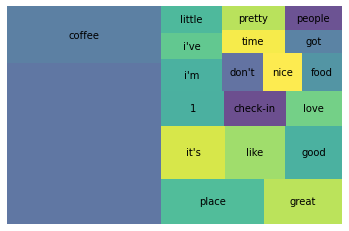

In [70]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [ ]:
shops['star_rating'] = shops['star_rating'].str[0:2]
shops['star_rating'] = shops['star_rating'].astype('int')

In [123]:

shops_df = shops.copy()
good = shops_df[shops_df['star_rating']>= 4].copy()
bad = shops_df[shops_df['star_rating'] <= 3].copy()

print(good.shape,bad.shape)

(6140, 4) (1476, 4)


In [126]:
good_tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    good_tokens.append(doc_tokens)

good['tokens'] = good_tokens

bad_tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    bad_tokens.append(doc_tokens)

bad['tokens'] = bad_tokens

In [127]:
good_wc = count(good['tokens'])
bad_wc = count(bad['tokens'])

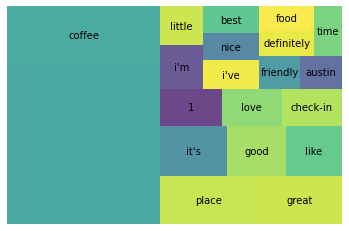

In [134]:
good_wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

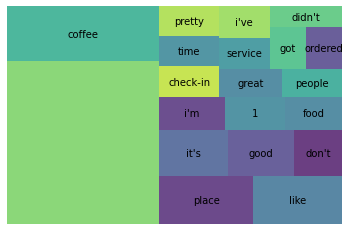

In [133]:
bad_wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=bad_wc_top20['pct_total'], label=bad_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

